<a href="https://colab.research.google.com/github/affandhanbad-dev/Music-Recomendation-webapp/blob/main/Music_recomendation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle -q

In [ ]:
import os
import json
import zipfile
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np

In [ ]:
kaggle_config = json.load(open('kaggle.json'))

In [ ]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [ ]:
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

In [ ]:
# import json
# with open('kaggle.json', 'r') as f:
#     kaggle_config = json.load(f)
# kaggle_config

In [ ]:
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
  0% 0.00/20.7M [00:00<?, ?B/s]
100% 20.7M/20.7M [00:00<00:00, 1.24GB/s]


In [ ]:
!ls

kaggle.json  sample_data  spotify-million-song-dataset.zip


In [ ]:
with zipfile.ZipFile('spotify-million-song-dataset.zip', 'r') as z:
    z.extractall()

In [ ]:
dt = pd.read_csv('/content/spotify_millsongdata.csv')

In [ ]:
dt.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
dt.shape

(57650, 4)

In [ ]:
dt.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [ ]:
dt.describe()

,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44824,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/z/zwan/heartsong_20148991.html,I've got sunshine on a cloudy day \r\nWhen it...
freq,191,35,1,6


In [ ]:
top_artist = dt["artist"].value_counts().head(10)
top_artist

,count
artist,
Donna Summer,191
Gordon Lightfoot,189
Bob Dylan,188
George Strait,188
Loretta Lynn,187
Alabama,187
Cher,187
Reba Mcentire,187
Chaka Khan,186


In [ ]:
dt = dt.sample(20000)

In [ ]:
dt = dt.drop('link',axis = 1).reset_index(drop = True)

In [ ]:
dt.shape

(20000, 3)

In [ ]:
# dt = dt.reset_index(drop = True)

In [ ]:
dt.head()

,artist,song,text
0,Gary Numan,Exile,I heard it in my sleep \r\nA voice more dead ...
1,Elvis Costello,Human Touch,I know I've just gotta get out of this place ...
2,Yes,Give Love Each Day,Standing here on sacred ground \r\nSome days ...
3,Travis,Days Of Our Lives,How many times have you walked through my door...
4,Old 97's,Up The Devil's Pay,I'm gonna tend a bad fire until you come aroun...


In [ ]:
all_lyrics = "".join(dt['text'].dropna())
wordcloud = WordCloud(width = 800, height = 400, background_color= 'black').generate(all_lyrics)

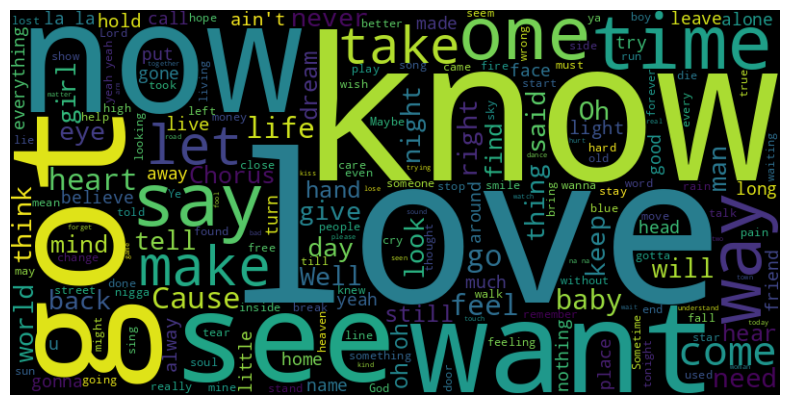

In [ ]:
plt.figure(figsize = (10,5))
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def text_processed(text):
  text = re.sub(r"[^a-zA-Z\s]","",text)
  text = text.lower()
  text = word_tokenize(text)
  text = [word for word in text if word not in stop_words]
  return " ".join(text)

In [ ]:
dt["clean_text"]= dt['text'].apply(text_processed)

In [ ]:
dt['clean_text']

,clean_text
0,heard sleep voice dead old thought id known fe...
1,know ive got ta get place cant stand mechanica...
2,standing sacred ground days mad world let word...
3,many times walked door many times heard song m...
4,im gon na tend bad fire come around id sing re...
...,...
19995,ive waiting long time love thats real come way...
19996,comes time must make minds angel singing true ...
19997,lovers depend moonlight love affair babies dep...
19998,okay anyone whos still listening song called f...


In [ ]:
dt.head()

,artist,song,text,clean_text
0,Gary Numan,Exile,I heard it in my sleep \r\nA voice more dead ...,heard sleep voice dead old thought id known fe...
1,Elvis Costello,Human Touch,I know I've just gotta get out of this place ...,know ive got ta get place cant stand mechanica...
2,Yes,Give Love Each Day,Standing here on sacred ground \r\nSome days ...,standing sacred ground days mad world let word...
3,Travis,Days Of Our Lives,How many times have you walked through my door...,many times walked door many times heard song m...
4,Old 97's,Up The Devil's Pay,I'm gonna tend a bad fire until you come aroun...,im gon na tend bad fire come around id sing re...


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features = 10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(dt['clean_text'])

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
def recomended_songs (song_name, cosine_sim = cosine_sim, dt = dt , top_n = 5):
  song_index = dt[dt['song'].str.lower() == song_name.lower()].index
  if len(song_index) == 0:
    return "This song is not present in our Database"
  song_index = song_index[0]
  sim_score = list(enumerate(cosine_sim[song_index]))
  sim_score = sorted(sim_score, key = lambda x: x[1], reverse = True)
  top_n_songs = sim_score[1:top_n+1]
  song_indices = [i[0] for i in top_n_songs]
  return dt['song'].iloc[song_indices]

In [ ]:
dt["song"][2]

'Give Love Each Day'

In [ ]:
recomendation = recomended_songs("Human Touch")
print(recomendation)

6625              One More Time
14459    I Need You Like A Drug
10665             Model Citizen
7367             I Need To Know
3209               Give It A Go
Name: song, dtype: object
